# **WEEK 8 - HOMEWORK 1**

# **About Dataset**
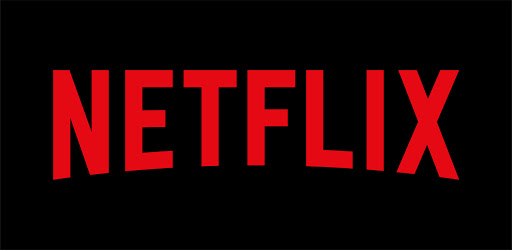

Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

In [ ]:
# Import Library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
# Download data "netflix_titles.csv" di https://www.kaggle.com/shivamb/netflix-shows/download for dataset

# Ini untuk upload dataset dari local ke google colab
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving netflix_titles.csv to netflix_titles (1).csv
User uploaded file "netflix_titles.csv" with length 3399671 bytes


In [ ]:
data = pd.read_csv("netflix_titles.csv")
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df_tv = data[data["type"] == "TV Show"]
df_movies = data[data["type"] == "Movie"]

# **1. Analysis of Movies vs TV Shows**

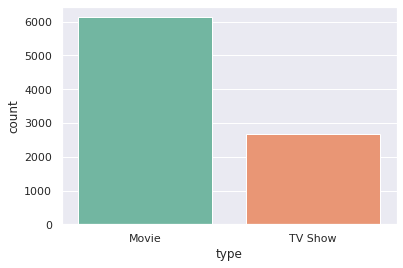

In [ ]:
sns.set(style = "darkgrid")
ax = sns.countplot(x = "type", data = data, palette = "Set2")

Dapat dilihat bahwa lebih banyak Movies dibandingkan TV Show dalam Netflix

# **2. Movie Rating Analysis**

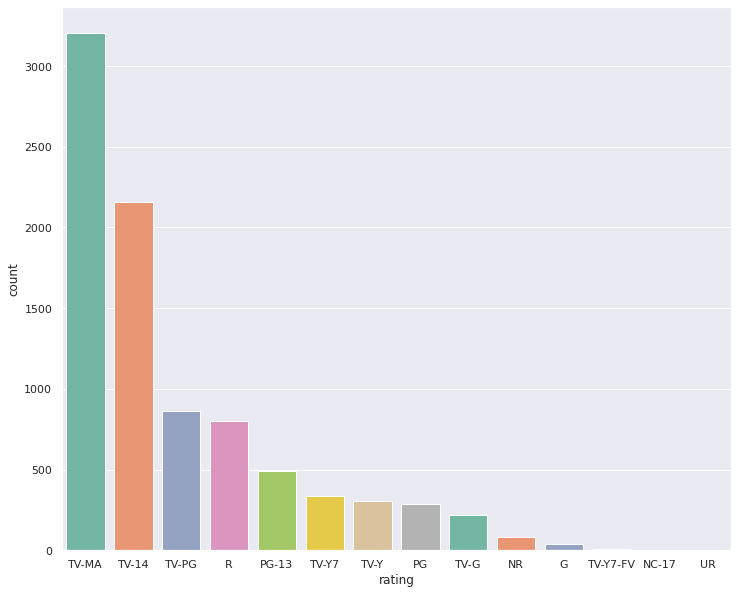

In [ ]:
plt.figure(figsize=(12,10))
sns.set(style = "darkgrid")
ax = sns.countplot(x = "rating", data = data, palette = "Set2", 
                   order = data['rating'].value_counts().index[0:14])

Jumlah movies terbesar ada pada rating 'TV-MA'. "TV-MA" adalah peringkat yang ditetapkan oleh TV Parental Guidelines untuk program televisi yang dirancang hanya untuk penonton dewasa.

Terbesar kedua adalah 'TV-14' singkatan dari konten yang mungkin tidak pantas untuk anak-anak di bawah usia 14 tahun.

# **3. Analysis on Release Year of Movies**

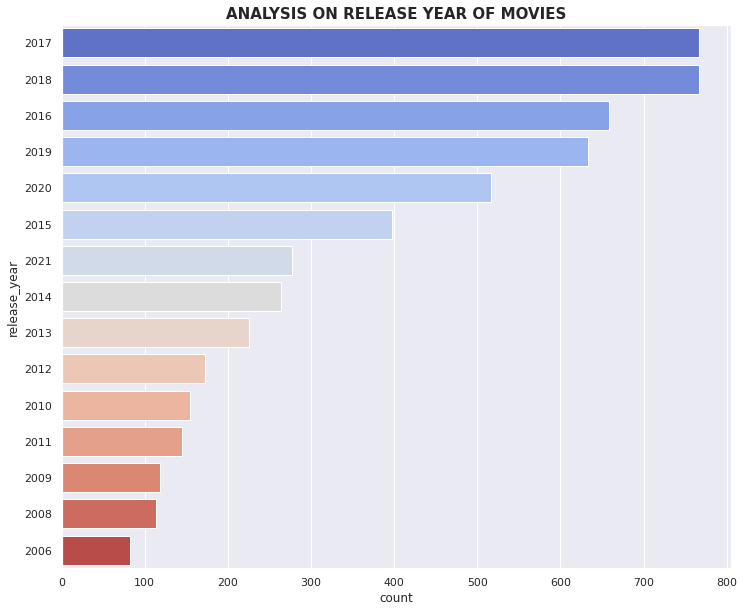

In [ ]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=df_movies, palette="coolwarm", order=df_movies['release_year'].value_counts().index[0:15])

plt.title('ANALYSIS ON RELEASE YEAR OF MOVIES', fontsize=15, fontweight='bold')
plt.show()

Sebagian besar movies dirilis pada tahun 2017 diikuti oleh 2018 dan 2016

# **4. Analysis on Release Year of TV Show**

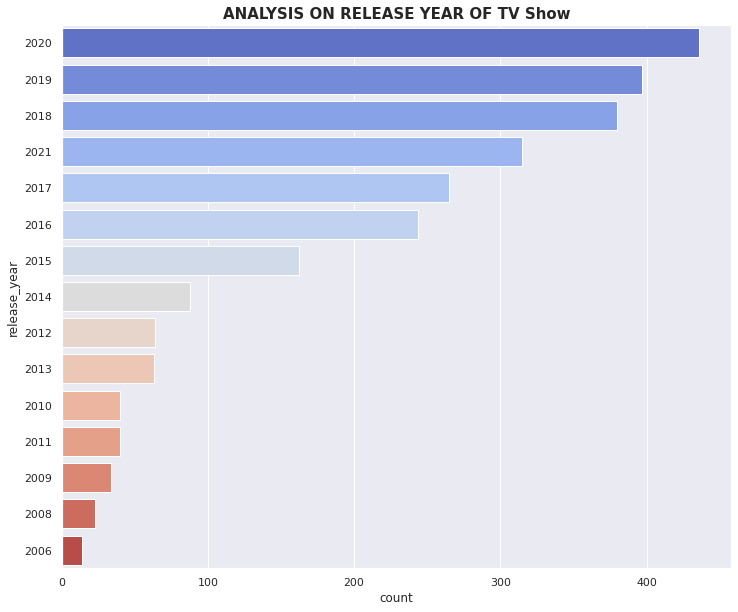

In [ ]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=df_tv, palette="coolwarm", order=df_tv['release_year'].value_counts().index[0:15])

plt.title('ANALYSIS ON RELEASE YEAR OF TV Show', fontsize=15, fontweight='bold')
plt.show()

Sebagian besar TV Shows dirilis pada tahun 2020 diikuti oleh 2019 dan 2018

# **5. Distribution of Movies Duration**

In [ ]:
fig = px.histogram(x=df_movies['duration'])
fig.update_xaxes(categoryorder="total descending")
fig.update_layout(
    title="Distribution of Movies Duration",
    xaxis_title="Duration of Movies",
)
fig.show()

Terbukti bahwa sebagian besar movies memiliki durasi mulai dari 85 - 120 menit.

# **6. Distribution of TV Shows Duration**

In [ ]:
fig = px.histogram(x=df_tv['duration'])
fig.update_layout(
    title="Distribution of TV Shows Duration",
    xaxis_title="Duration of TV ShowS",
)
fig.show()

Dapat dikatakan bahwa sebagian besar TV Shows berakhir pada musim ke-3 atau 4 (Season 3 or 4)

# **7. Top 10 Genre in Movies**

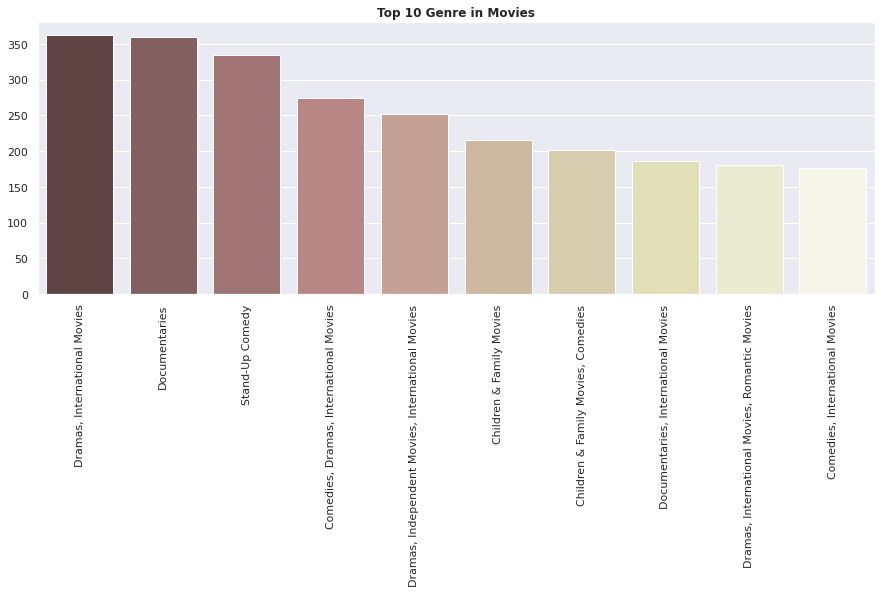

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x = df_movies["listed_in"].value_counts().head(10).index,
            y = df_movies["listed_in"].value_counts().head(10).values,palette="pink")
plt.xticks(rotation=90)
plt.title("Top 10 Genre in Movies",fontweight="bold")
plt.show()

Dapat dilihat bahwa genre terbaik di Movies ada pada genre Dramas, dan International Movies

# **8. Top 10 Genre in TV Shows**

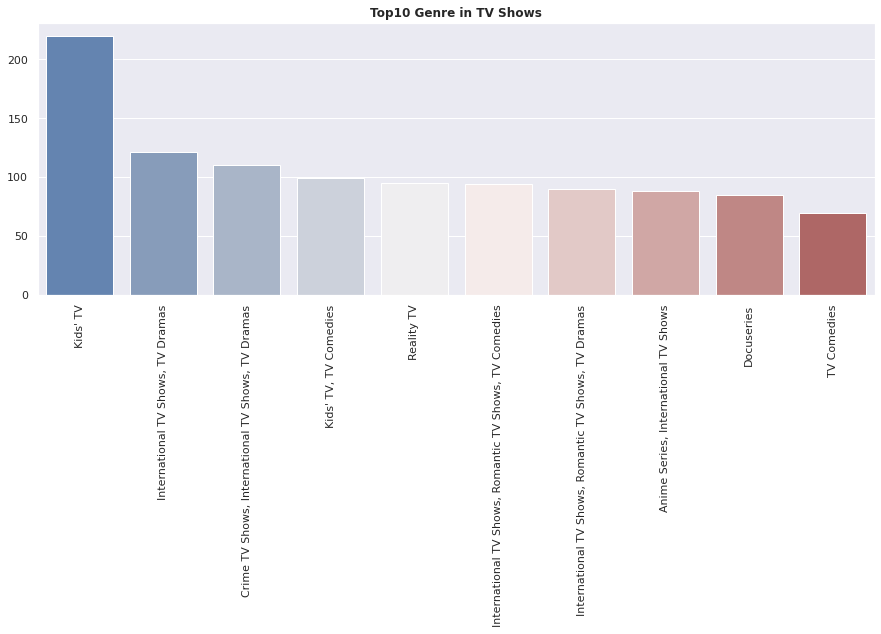

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x = df_tv["listed_in"].value_counts().head(10).index,
            y = df_tv["listed_in"].value_counts().head(10).values,palette="vlag")
plt.xticks(rotation=90)
plt.title("Top10 Genre in TV Shows",fontweight="bold")
plt.show()

Dapat dilihat bahwa genre terbaik di TV Shows ada pada genre Kids' TV